## COVID 19 Analysis
### Author: Pranay Saha
### Source: https://www.kaggle.com/imdevskp/corona-virus-report


#### Importing Data

In [ ]:
api_token = {"username":"pranaysaha","key":""}
!mkdir /root/.kaggle
!echo '{"username":"pranaysaha","key":""}' > /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d imdevskp/corona-virus-report

 36% 5.00M/13.8M [00:00<00:00, 39.5MB/s]
100% 13.8M/13.8M [00:00<00:00, 67.7MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/corona-virus-report.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!ls

corona-virus-report.zip      day_wise.csv      usa_county_wise.csv
country_wise_latest.csv      full_grouped.csv  worldometer_data.csv
covid_19_clean_complete.csv  sample_data


In [0]:
complete_data = pd.read_csv('covid_19_clean_complete.csv')
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37323 entries, 0 to 37322
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11154 non-null  object 
 1   Country/Region  37323 non-null  object 
 2   Lat             37323 non-null  float64
 3   Long            37323 non-null  float64
 4   Date            37323 non-null  object 
 5   Confirmed       37323 non-null  int64  
 6   Deaths          37323 non-null  int64  
 7   Recovered       37323 non-null  int64  
 8   Active          37323 non-null  int64  
 9   WHO Region      37323 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.8+ MB


#### Checking The Lat and Long of India

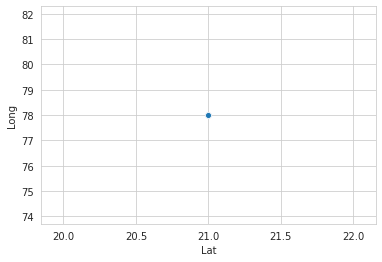

In [0]:
sns.scatterplot(x='Lat', y='Long', data= complete_data[complete_data['Country/Region']=='India'])

#### Extracting India Data and exploring data

In [0]:
complete_data[complete_data['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,21.0,78.0,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,21.0,78.0,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,21.0,78.0,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,21.0,78.0,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,21.0,78.0,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
36147,NaN,India,21.0,78.0,2020-06-08,265928,7473,129095,129360,South-East Asia
36408,NaN,India,21.0,78.0,2020-06-09,276146,7750,134670,133726,South-East Asia
36669,NaN,India,21.0,78.0,2020-06-10,286605,8498,135206,142901,South-East Asia
36930,NaN,India,21.0,78.0,2020-06-11,297535,8498,147195,141842,South-East Asia


In [0]:
complete_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [0]:
complete_data['Date']= pd.to_datetime(complete_data['Date'])

In [0]:
complete_data['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [0]:
india_comp_df = complete_data[complete_data['Country/Region'] == 'India']

In [0]:
india_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 129 to 37191
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  143 non-null    object        
 2   Lat             143 non-null    float64       
 3   Long            143 non-null    float64       
 4   Date            143 non-null    datetime64[ns]
 5   Confirmed       143 non-null    int64         
 6   Deaths          143 non-null    int64         
 7   Recovered       143 non-null    int64         
 8   Active          143 non-null    int64         
 9   WHO Region      143 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 12.3+ KB


#### Date vs. [ 'Confirmed', 'Deaths', 'Recovered', 'Active']

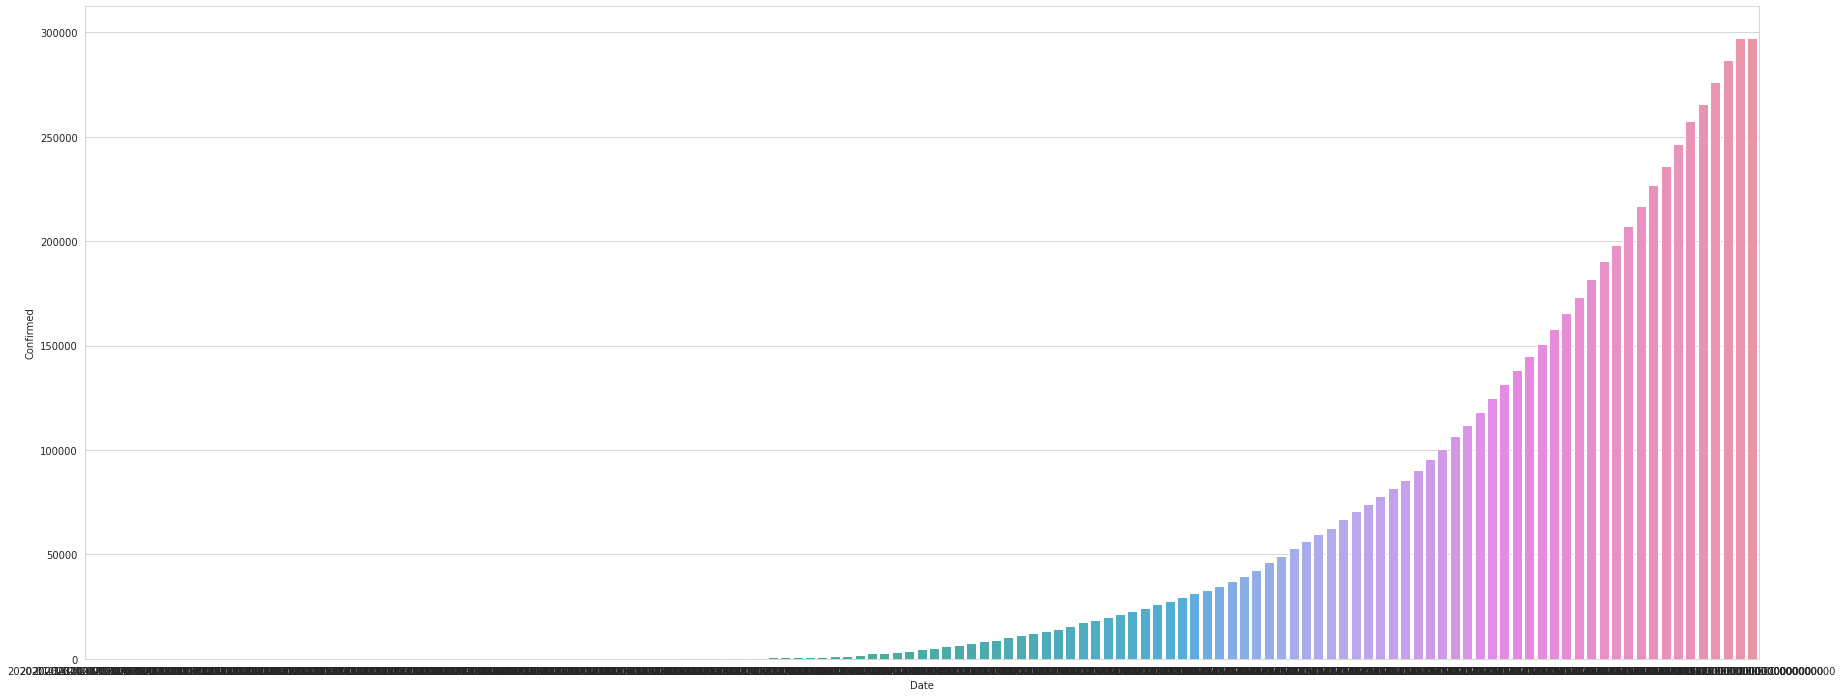

In [0]:
plt.figure(figsize=(30,12))

sns.barplot(x='Date', y='Confirmed', data=india_comp_df[india_comp_df['Confirmed']>0])

In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [0]:
import chart_studio.plotly as py
from plotly.offline import iplot, plot
import plotly.express as px

In [0]:
px.bar(india_comp_df, x='Date' ,y='Confirmed')

In [0]:
px.bar(india_comp_df, x='Date' ,y='Deaths')

In [0]:
px.bar(india_comp_df, x='Date' ,y='Recovered')

In [0]:
new_conf_cases = india_comp_df.iloc[-1]['Confirmed']-india_comp_df.iloc[-2]['Confirmed']
print("Total New Confirmed Cases: ", new_conf_cases)

Total New Confirmed Cases:  0


In [0]:
new_deaths = india_comp_df.iloc[-1]['Deaths']-india_comp_df.iloc[-2]['Deaths']
print("New Death Cases: ", new_deaths)

New Death Cases:  0


In [0]:
new_recovered = india_comp_df.iloc[-1]['Recovered']-india_comp_df.iloc[-2]['Recovered']
print("New Recovered Cases: ", new_recovered)

New Recovered Cases:  0


In [0]:
country_wise_data =complete_data.groupby('Country/Region')

In [0]:
max_cases = country_wise_data['Confirmed'].max().sort_values(ascending=False)
max_cases.head(10)

Country/Region
US                2048986
Brazil             828810
Russia             510761
India              297535
United Kingdom     292950
Spain              243209
Italy              236305
Peru               214788
France             188918
Germany            187226
Name: Confirmed, dtype: int64

In [0]:
max_deaths = country_wise_data['Deaths'].max().sort_values(ascending=False)
max_deaths.head(10)

Country/Region
US                114669
Brazil             41828
United Kingdom     41481
Italy              34223
France             29315
Spain              28752
Mexico             16448
Belgium             9646
Germany             8783
Iran                8659
Name: Deaths, dtype: int64

In [0]:
max_recovered = country_wise_data['Recovered'].max().sort_values(ascending=False)
max_recovered.head(10)

Country/Region
US         547386
Brazil     445123
Russia     268862
Italy      173085
Germany    171535
Spain      150376
Turkey     149102
India      147195
Iran       144649
Chile      131358
Name: Recovered, dtype: int64

In [0]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37323 entries, 0 to 37322
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11154 non-null  object        
 1   Country/Region  37323 non-null  object        
 2   Lat             37323 non-null  float64       
 3   Long            37323 non-null  float64       
 4   Date            37323 non-null  datetime64[ns]
 5   Confirmed       37323 non-null  int64         
 6   Deaths          37323 non-null  int64         
 7   Recovered       37323 non-null  int64         
 8   Active          37323 non-null  int64         
 9   WHO Region      37323 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 2.8+ MB


In [0]:
complete_data['Active']=complete_data['Confirmed']- complete_data['Recovered'] -complete_data['Deaths']
complete_data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific


In [0]:
complete_data[['Lat','Long']].count()

Lat     37323
Long    37323
dtype: int64

In [0]:
complete_data[complete_data['Province/State'].notnull()]['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'Greenland', 'France',
       'Netherlands', 'United Kingdom'], dtype=object)

In [0]:
complete_data.drop('Province/State', axis=1, inplace=True)

In [0]:
complete_data.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [0]:
complete_data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [0]:
complete_data.drop('WHO Region', axis=1, inplace= True)

In [0]:
complete_data.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [0]:
complete_data['Confirmed'].max()

2048986

In [0]:
india_comp_df['Confirmed'].pct_change(fill_method='ffill')

129           NaN
390           NaN
651           NaN
912           NaN
1173          NaN
           ...   
36147    0.032786
36408    0.038424
36669    0.037875
36930    0.038136
37191    0.000000
Name: Confirmed, Length: 143, dtype: float64

In [0]:
px.bar(india_comp_df, x='Date', y=india_comp_df['Confirmed'].pct_change(fill_method='ffill'))

In [0]:
country_wise_data['Confirmed'].pct_change()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
37318    0.011076
37319    0.069374
37320    0.006173
37321    0.014067
37322    0.000000
Name: Confirmed, Length: 37323, dtype: float64

In [0]:
country_wise_data['Date'].max()

Country/Region
Afghanistan          2020-06-12
Albania              2020-06-12
Algeria              2020-06-12
Andorra              2020-06-12
Angola               2020-06-12
                        ...    
West Bank and Gaza   2020-06-12
Western Sahara       2020-06-12
Yemen                2020-06-12
Zambia               2020-06-12
Zimbabwe             2020-06-12
Name: Date, Length: 187, dtype: datetime64[ns]

In [0]:
# sns.barplot(x='Countries/', y='Deaths', data=complete_data)
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37323 entries, 0 to 37322
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  37323 non-null  object        
 1   Lat             37323 non-null  float64       
 2   Long            37323 non-null  float64       
 3   Date            37323 non-null  datetime64[ns]
 4   Confirmed       37323 non-null  int64         
 5   Deaths          37323 non-null  int64         
 6   Recovered       37323 non-null  int64         
 7   Active          37323 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.3+ MB


In [0]:
complete_data['Active'].tail()

37318     471
37319     465
37320      64
37321    1695
37322       2
Name: Active, dtype: int64

In [0]:
ind_today_data= india_comp_df[india_comp_df['Date'] == india_comp_df['Date'].max()]
ind_today_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
37191,NaN,India,21.0,78.0,2020-06-12,297535,8498,147195,141842,South-East Asia


In [0]:
us_comp_data = complete_data[complete_data['Country/Region']=='US']

Text(0.5, 1.0, 'India Active vs Recovered')

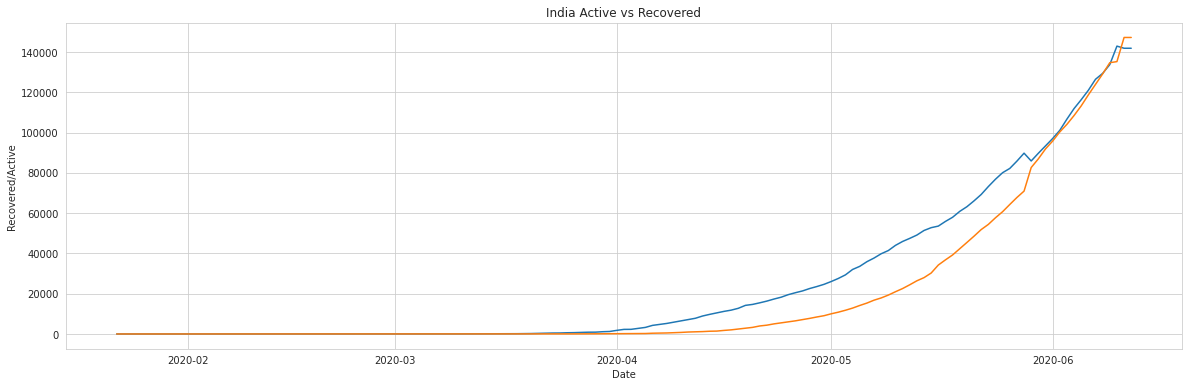

In [0]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Active', data= india_comp_df)
sns.lineplot(x='Date', y='Recovered', data= india_comp_df)
plt.ylabel('Recovered/Active')
plt.title('India Active vs Recovered')


Text(0.5, 1.0, 'USA Active vs Recovered')

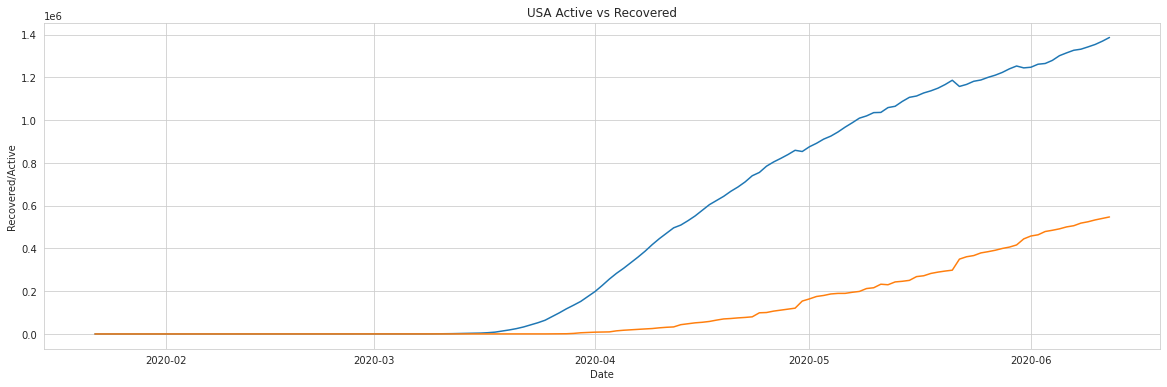

In [0]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Active', data= us_comp_data)
sns.lineplot(x='Date', y='Recovered', data= us_comp_data)

plt.ylabel('Recovered/Active')
plt.title('USA Active vs Recovered')


In [0]:
india_recovery_rate = ind_today_data['Recovered']/ind_today_data['Confirmed']*100
india_recovery_rate

37191    49.471491
dtype: float64

In [0]:
complete_data['Recovery Rate']= 100* complete_data['Recovered']/complete_data['Confirmed']
complete_data['Mortality Rate']= 100* complete_data['Deaths']/complete_data['Confirmed']

In [0]:
# Highest 5 Recovery Rate
complete_data[complete_data['Date'] == complete_data['Date'].max()][['Country/Region','Recovery Rate']].sort_values('Recovery Rate', ascending= False)

,Country/Region,Recovery Rate
37136,China,100.0
37314,United Kingdom,100.0
37315,France,100.0
37139,China,100.0
37132,China,100.0
...,...,...
37101,Canada,0.0
37102,Canada,0.0
37304,Canada,0.0
37303,Canada,0.0


In [0]:
complete_data[(complete_data['Date'] ==  complete_data['Date'].max()) & (complete_data['Country/Region'] == 'China')]

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
37110,China,31.8257,117.2264,2020-06-12,991,6,985,0,99.394551,0.605449
37111,China,40.1824,116.4142,2020-06-12,601,9,584,8,97.171381,1.497504
37112,China,30.0572,107.8740,2020-06-12,579,6,573,0,98.963731,1.036269
37113,China,26.0789,117.9874,2020-06-12,361,1,356,4,98.614958,0.277008
37114,China,37.8099,101.0583,2020-06-12,139,2,137,0,98.561151,1.438849
37115,China,23.3417,113.4244,2020-06-12,1608,8,1590,10,98.880597,0.497512
37116,China,23.8298,108.7881,2020-06-12,254,2,252,0,99.212598,0.787402
37117,China,26.8154,106.8748,2020-06-12,147,2,145,0,98.639456,1.360544
37118,China,19.1959,109.7453,2020-06-12,171,6,162,3,94.736842,3.508772
37119,China,39.5490,116.1306,2020-06-12,328,6,322,0,98.170732,1.829268


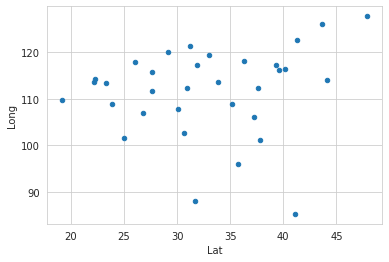

In [0]:
complete_data[(complete_data['Date'] ==  complete_data['Date'].max()) & (complete_data['Country/Region'] == 'China')].plot.scatter(x='Lat', y='Long')

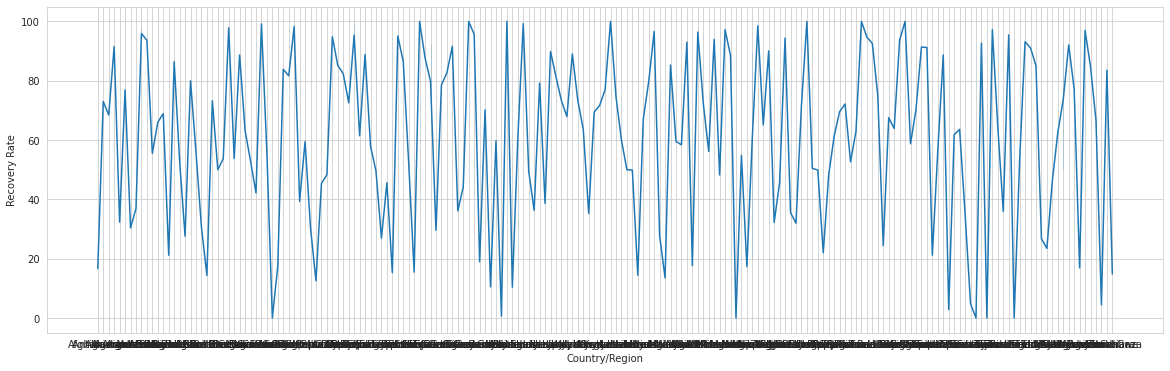

In [0]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Country/Region', y='Recovery Rate', data= complete_data[complete_data['Date'] == complete_data['Date'].max()].sort_values('Recovery Rate'))

In [0]:
india_comp_df.drop(['Province/State', 'WHO Region'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
india_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 129 to 37191
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  143 non-null    object        
 1   Lat             143 non-null    float64       
 2   Long            143 non-null    float64       
 3   Date            143 non-null    datetime64[ns]
 4   Confirmed       143 non-null    int64         
 5   Deaths          143 non-null    int64         
 6   Recovered       143 non-null    int64         
 7   Active          143 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 10.1+ KB


In [0]:
india_comp_df.head(20)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
129,India,21.0,78.0,2020-01-22,0,0,0,0
390,India,21.0,78.0,2020-01-23,0,0,0,0
651,India,21.0,78.0,2020-01-24,0,0,0,0
912,India,21.0,78.0,2020-01-25,0,0,0,0
1173,India,21.0,78.0,2020-01-26,0,0,0,0
1434,India,21.0,78.0,2020-01-27,0,0,0,0
1695,India,21.0,78.0,2020-01-28,0,0,0,0
1956,India,21.0,78.0,2020-01-29,0,0,0,0
2217,India,21.0,78.0,2020-01-30,1,0,0,1
2478,India,21.0,78.0,2020-01-31,1,0,0,1


In [0]:
ind_pred_df = india_comp_df.pivot_table(index='Date', values= ['Confirmed', 'Deaths', 'Active',  'Recovered'])

In [0]:
ind_pred_df.tail(10)

,Active,Confirmed,Deaths,Recovered
Date,,,,
2020-06-03,106665,216824,6088,104071
2020-06-04,111900,226713,6363,108450
2020-06-05,116302,236184,6649,113233
2020-06-06,120981,246622,6946,118695
2020-06-07,126431,257486,7207,123848
2020-06-08,129360,265928,7473,129095
2020-06-09,133726,276146,7750,134670
2020-06-10,142901,286605,8498,135206
2020-06-11,141842,297535,8498,147195


In [0]:
ind_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2020-01-22 to 2020-06-12
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Active     143 non-null    int64
 1   Confirmed  143 non-null    int64
 2   Deaths     143 non-null    int64
 3   Recovered  143 non-null    int64
dtypes: int64(4)
memory usage: 5.6 KB


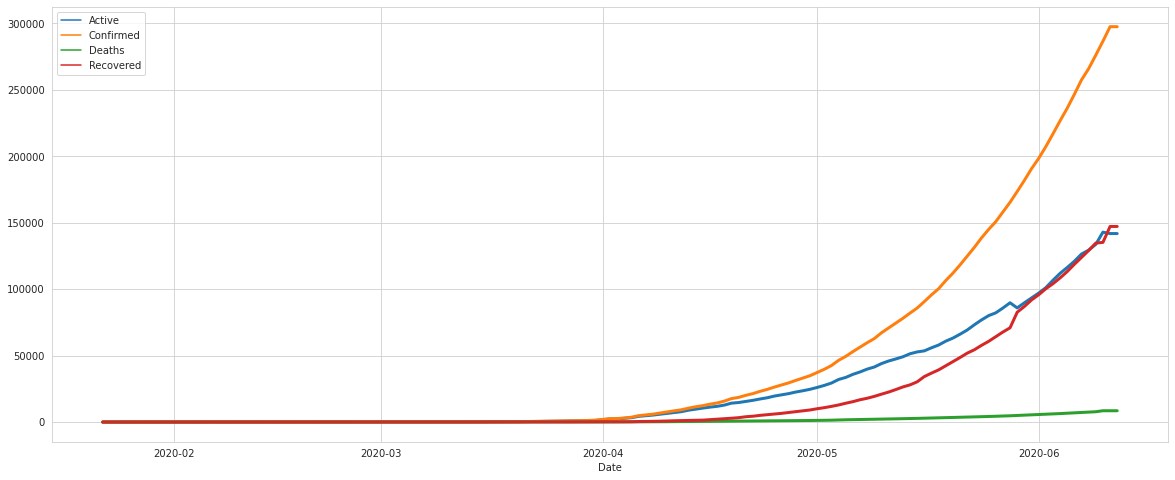

In [0]:
plt.figure(figsize=(20,8))
sns.lineplot(data = ind_pred_df, lw=3, dashes=False)

In [0]:
import tensorflow as tf
from tensorflow import keras
import math

In [0]:
TRAIN_SIZE = math.floor(0.8 * len(ind_pred_df))
print(TRAIN_SIZE)

114


In [0]:
train = ind_pred_df.iloc[:TRAIN_SIZE]
test = ind_pred_df.iloc[TRAIN_SIZE:]

In [0]:
print(train.shape, test.shape)

(114, 4) (29, 4)


In [0]:
ind_diff_data =ind_pred_df.diff(periods=1)
ind_diff_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2020-01-22 to 2020-06-12
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Active     142 non-null    float64
 1   Confirmed  142 non-null    float64
 2   Deaths     142 non-null    float64
 3   Recovered  142 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [0]:
ind_diff_data

,Active,Confirmed,Deaths,Recovered
Date,,,,
2020-01-22,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-06-08,2929.0,8442.0,266.0,5247.0
2020-06-09,4366.0,10218.0,277.0,5575.0
2020-06-10,9175.0,10459.0,748.0,536.0


In [0]:
# plt.figure(figsize=(20,8))
# sns.barplot(x= ind_diff_data.index.values, y='Confirmed',data= ind_diff_data)
px.bar(data_frame= ind_diff_data, x= ind_diff_data.index.values, y= ind_diff_data['Confirmed'])

In [0]:
px.bar(data_frame= ind_diff_data, x= ind_diff_data.index.values, y= ind_diff_data['Active'])


In [0]:
px.bar(data_frame= ind_diff_data, x= ind_diff_data.index.values, y= ind_diff_data['Recovered'])


In [0]:
px.bar(data_frame= ind_diff_data, x= ind_diff_data.index.values, y= ind_diff_data['Deaths'])


In [0]:
ind_diff_data.tail()

,Active,Confirmed,Deaths,Recovered
Date,,,,
2020-06-08,2929.0,8442.0,266.0,5247.0
2020-06-09,4366.0,10218.0,277.0,5575.0
2020-06-10,9175.0,10459.0,748.0,536.0
2020-06-11,-1059.0,10930.0,0.0,11989.0
2020-06-12,0.0,0.0,0.0,0.0
